In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
# import lightgbm as lgb
import pickle
import joblib

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from xgboost import plot_tree

In [104]:
df = pd.read_csv("data/one_hot_data.csv")

In [105]:
df.head()

,Unnamed: 0,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,0,802906,6,487,12198,2,30,6,5,1,...,0,0,0,0,0,0,0,0,1,0
1,1,28830,8,900,2812,2,10,8,7,0,...,0,0,0,0,0,0,0,0,1,0
2,2,94947,21,363,8973,2,10,5,5,0,...,0,0,0,0,0,0,0,0,1,0
3,3,590882,22,418,10694,2,10,6,5,0,...,0,0,0,0,0,0,0,0,1,0
4,4,201944,11,131,1488,3,30,8,9,1,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df2 = pd.read_csv("data/train_labels.csv")

In [5]:
df2.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
test = df['building_id']
test2 = df2['building_id']
for i in range(len(test)):
    if test[i] != test2[i]:
        print(i)

In [7]:
X = df.drop(['Unnamed: 0', 'building_id'], axis=1)

In [106]:
temp = df.drop(['Unnamed: 0', 'building_id'], axis=1)

In [107]:
temp.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [108]:
columns = temp.columns

In [9]:
X = X.to_numpy()

In [10]:
Y = df2['damage_grade'].to_numpy()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
clf = tree.DecisionTreeClassifier()

In [13]:
cross_val_score(clf, X_train, y_train, cv=3)

array([0.64697672, 0.64700042, 0.64668384])

In [14]:
clf = clf.fit(X_train, y_train)

In [31]:
# np.sum(clf.predict(X_test) == y_test) / len(df.index)
print(f1_score(y_train, clf.predict(X_train), average='micro'))
print(f1_score(y_test, clf.predict(X_test), average='micro'))

0.9867757099002302
0.6549951075382283


In [43]:
rf = RandomForestClassifier(n_estimators=3000, n_jobs=-1)

In [44]:
# cross_val_score(rf, X_train, y_train, cv=3, n_jobs=-1)

In [45]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [36]:
predictions = rf.predict(X_test)

In [37]:
# np.sum(predictions==y_test) / len(df.index)
print(f1_score(y_train, rf.predict(X_train), average='micro'))
print(f1_score(y_test, predictions, average='micro'))

0.9867757099002302
0.7137813932963681


In [59]:
# pickle.dump(rf, open("decision_models/rf3000.model", 'wb'))
joblib.dump(rf, "decision_models/rf3000.model")

In [38]:
gb = xgb.XGBClassifier(n_estimators=3000, n_jobs=-1)
# parameters = {
#      "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#      "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15, 30, 100],
#      "min_child_weight" : [ 1, 3, 5, 7 ],
#      "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#      "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
# }

In [39]:
# grid = GridSearchCV(clf,
#                     parameters, n_jobs=4,
#                     scoring="neg_log_loss",
#                     cv=3)

In [40]:
gb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
              n_jobs=-1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [41]:
gb_predictions = gb.predict(X_test)

In [42]:
print(f1_score(y_train, gb.predict(X_train), average='micro'))
print(f1_score(y_test, gb_predictions, average='micro'))

0.7507818495778972
0.7365361370656741


In [143]:
gbf = xgb.XGBClassifier(n_estimators=3000, objective='multi:softmax', num_class=3, n_jobs=-1)

In [144]:
gbf.fit(X, Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=3000,
              n_jobs=-1, nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

<Figure size 1080x288 with 0 Axes>

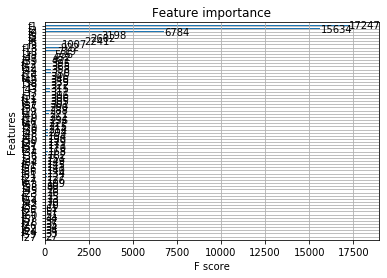

<Figure size 432x288 with 0 Axes>

In [169]:
# feat_imp = pd.Series(gbf.booster().get_fscore()).sort_values(ascending=False)
# feat_imp.plot(kind='bar', title='Feature Importances')
# plt.ylabel('Feature Importance Score')
# plt.savefig("xgboostfeatimp.png")

# importances = gbf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in gbf.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# # Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
# plt.show()
plt.figure(figsize=(15,4))
xgb.plot_importance(gbf)
plt.show()
plt.savefig("f_importance_xgboostf3000")

In [155]:
print(f1_score(y_train, gbf.predict(X_train), average='micro'))
print(f1_score(y_test, gbf.predict(X_test), average='micro'))

0.7498369148119723
0.7508297998887205


In [175]:
joblib.dump(gbf, "decision_models/xgbf3000.model")

['decision_models/xgbf3000.model']

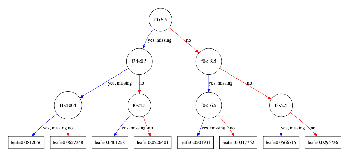

In [164]:
plot_tree(gb, num_trees=4)
# tree.plot_tree(gbf)
plt.savefig("xgboostf4.png")

In [ ]:
test = pd.read_csv('data/test_values.csv', index_col='building_id')
test.head()

In [88]:
def oneHot(df, column_name):
    one_hot = pd.get_dummies(df[column_name])
    df = df.drop(column_name,axis = 1)
    df = df.join(one_hot)
    for letter in one_hot.columns:
        df[column_name + "_" + letter] = df[letter]
        df.drop(letter, axis=1, inplace=True)
    return df

categorical_vars = ["foundation_type", "land_surface_condition", "roof_type", "ground_floor_type", "other_floor_type", "position", "plan_configuration", "legal_ownership_status"]
for var in categorical_vars:
    test = oneHot(test, var)
    

In [118]:
print(len(test.columns), len(columns))

for i in range (len(test.columns)):

    if test.columns[i] != columns[i]:
        print(test.columns[i], columns[i])

68 68


In [117]:
test = test.reindex(columns=columns)

In [119]:
test1 = test.to_numpy()

In [156]:
test_pred = gbf.predict(test1)

In [157]:
submission_format = pd.read_csv('data/submission_format.csv', index_col='building_id')

In [158]:
my_submission = pd.DataFrame(data=test_pred,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [159]:
my_submission.head()

,damage_grade
building_id,
300051,3
99355,2
890251,2
745817,1
421793,3


In [161]:
my_submission.to_csv('data/submission1.csv')

In [ ]:
joblib.dump(gb, "decision_models/gb3000.model")

In [46]:
ngb = xgb.XGBClassifier(n_estimators=1000, n_jobs=-1)

In [47]:
ngb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
              n_jobs=-1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [53]:
print(f1_score(y_train, ngb.predict(X_train), average='micro'))
print(f1_score(y_test, ngb.predict(X_test), average='micro'))

0.7261655794320797
0.7211872373899196


In [62]:
opt_xgb = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(opt_xgb,
                    parameters, n_jobs=-1,
                    scoring="f1_micro",
                    cv=3)

In [63]:
grid.fit(X_train, y_train)

ValueError: Invalid parameter eta for estimator XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.3, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
              subsample=1). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
print(f1_score(y_train, grid.predict(X_train), average='micro'))
print(f1_score(y_test, grid.predict(X_test), average='micro'))

In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)